# Breast Cancer Classification | Logistic Regression



In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.stats as stats
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


In [2]:
#Reading the csv file 
data = pd.read_csv('Cancer.csv',index_col=0).reset_index()

## 1. Data Exploration and Visualization

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# Checking for NaNs across the dataframe
print(data.isnull().sum())

#Since we see only column 'Unnamed: 32' has all the rows as null, we can remove that one column instead of just dropping the NaN values
data.drop('Unnamed: 32',axis=1, inplace=True)

#Removing the id column 
data.drop('id',axis=1,inplace=True)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#Converting the dependent variable 'diagnosis' to 1/0 (Malignant - 1, Benign - 0)
var="diagnosis"
data[var].unique()

array(['M', 'B'], dtype=object)

In [6]:
data[var]=data[var].apply(lambda x: 1 if x=='M' else  0).astype(float)
data[var].unique()

array([1., 0.])

In [7]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


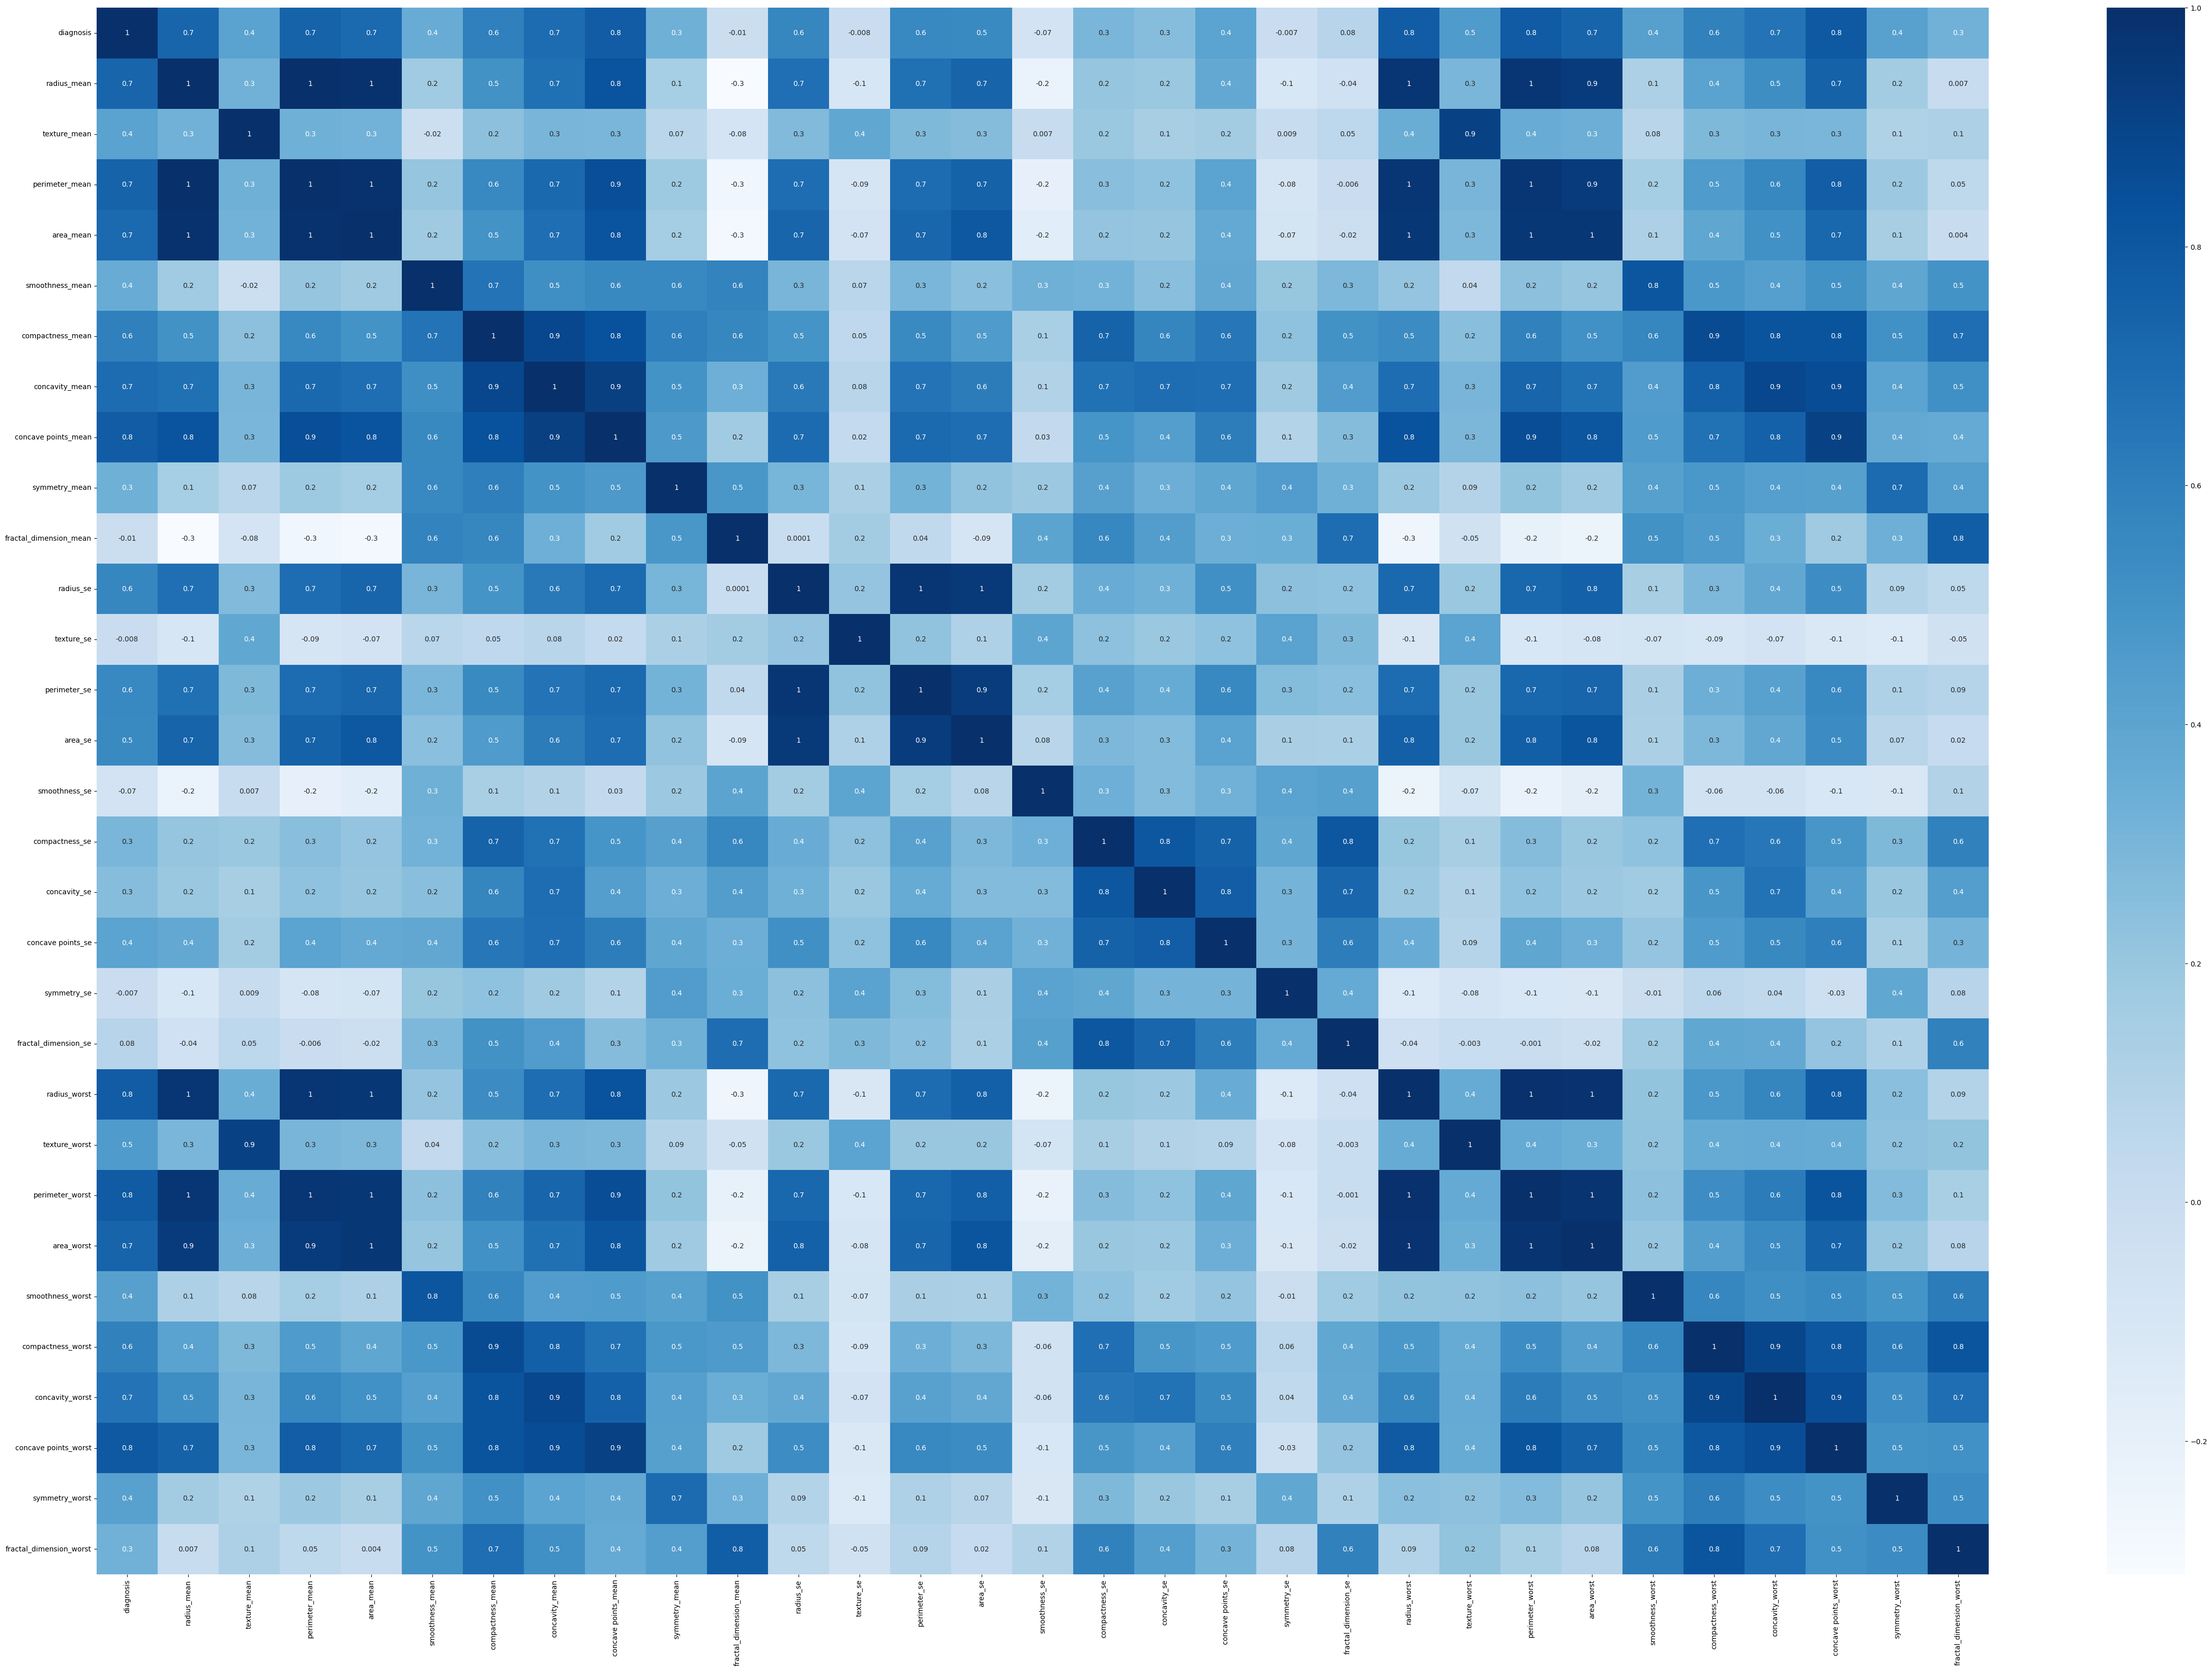

In [8]:
# Analyzing the correlation between independent variabes and dependent variables.
# This will give us some sense to look into further data exploration before the model building phase.
# Although, this exploration is just for a high level understanding, more things could come out during the model fitting part.

#Finding correlation of all the variables with the dependent variable.
cor=data.corr()
plt.figure(figsize=(60,40))
sns.heatmap(data=cor,annot=True,cmap='Blues',fmt='.1g')
plt.show()

In [9]:
# Understand the Dependent Variable 

# Storing the columns that have a correlation of 0.7 or more w.r.t to the dependent variable 'Diagnosis'
var_of_interest = cor[cor[var]>=0.7].index.tolist()
var_of_interest

['diagnosis',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [2]:
#Create histogram for all these columns 

#First remove the column 'diagnosis' from var_of_interest
var_of_interest.remove(var)

for col in var_of_interest:
    # print(f"The average {var} in the dataset is {round(data[var].mean(),0)}")
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], bins=20, edgecolor='black', alpha=0.5,kde=True) # set the histrogram
    # set value, x, y labels
    plt.title(f"Histogram of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.show() #print the histrogram

/var/folders/6_/dr76lzfx6k97z9ld6s_cvxs00000gn/T/ipykernel_6309/1327938570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=var, data=data, palette='Set2', orient='h')


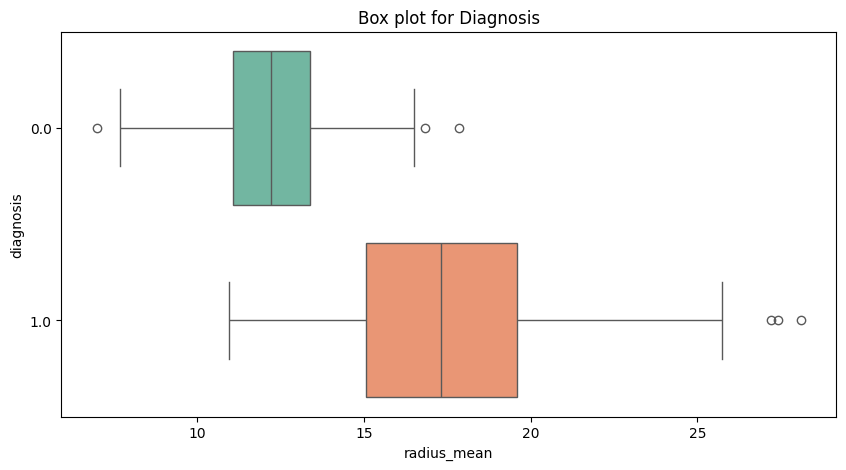

/var/folders/6_/dr76lzfx6k97z9ld6s_cvxs00000gn/T/ipykernel_6309/1327938570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=var, data=data, palette='Set2', orient='h')


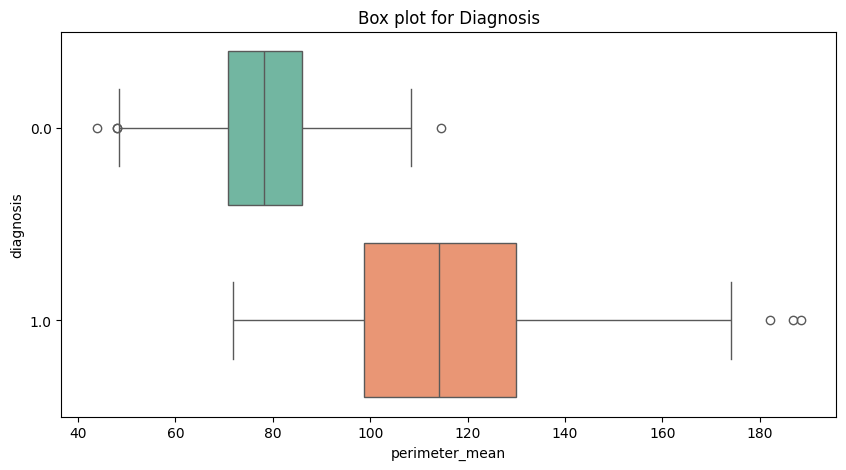

/var/folders/6_/dr76lzfx6k97z9ld6s_cvxs00000gn/T/ipykernel_6309/1327938570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=var, data=data, palette='Set2', orient='h')


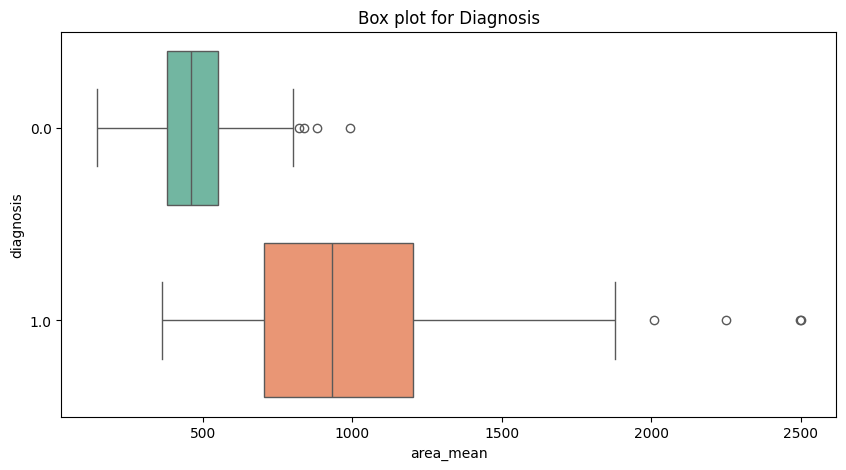

/var/folders/6_/dr76lzfx6k97z9ld6s_cvxs00000gn/T/ipykernel_6309/1327938570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=var, data=data, palette='Set2', orient='h')


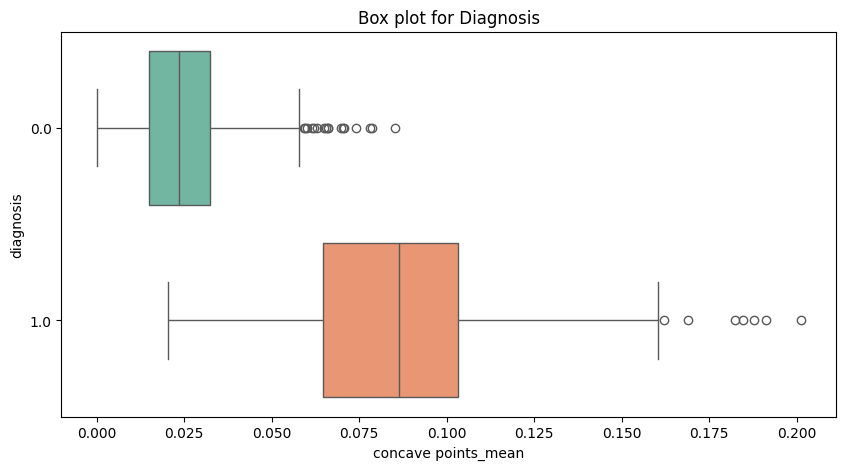

/var/folders/6_/dr76lzfx6k97z9ld6s_cvxs00000gn/T/ipykernel_6309/1327938570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=var, data=data, palette='Set2', orient='h')


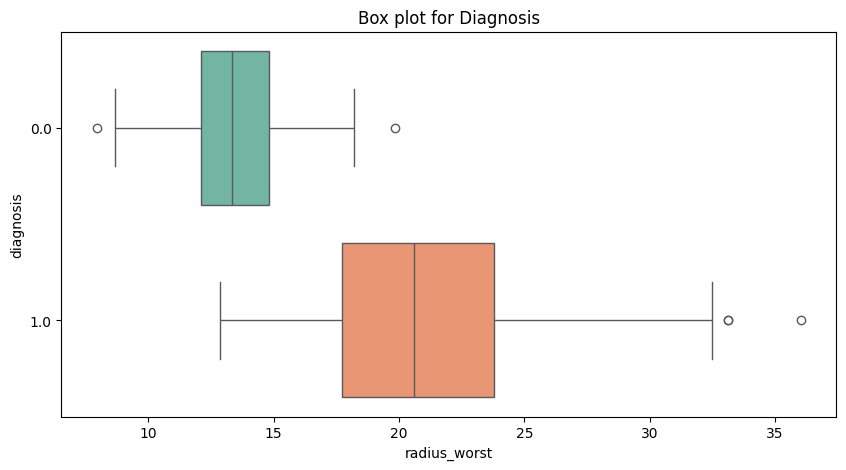

/var/folders/6_/dr76lzfx6k97z9ld6s_cvxs00000gn/T/ipykernel_6309/1327938570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=var, data=data, palette='Set2', orient='h')


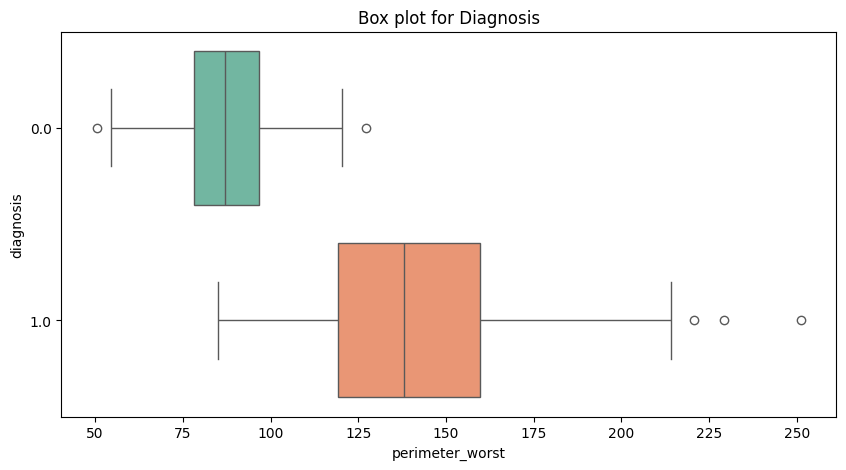

/var/folders/6_/dr76lzfx6k97z9ld6s_cvxs00000gn/T/ipykernel_6309/1327938570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=var, data=data, palette='Set2', orient='h')


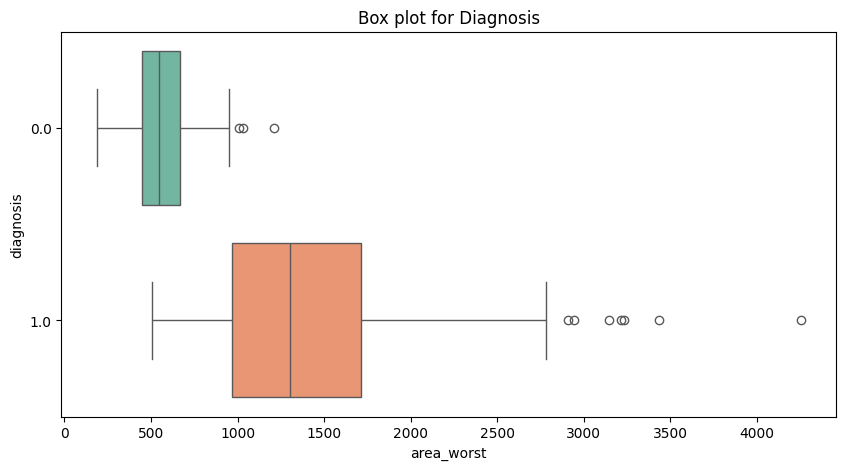

/var/folders/6_/dr76lzfx6k97z9ld6s_cvxs00000gn/T/ipykernel_6309/1327938570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=var, data=data, palette='Set2', orient='h')


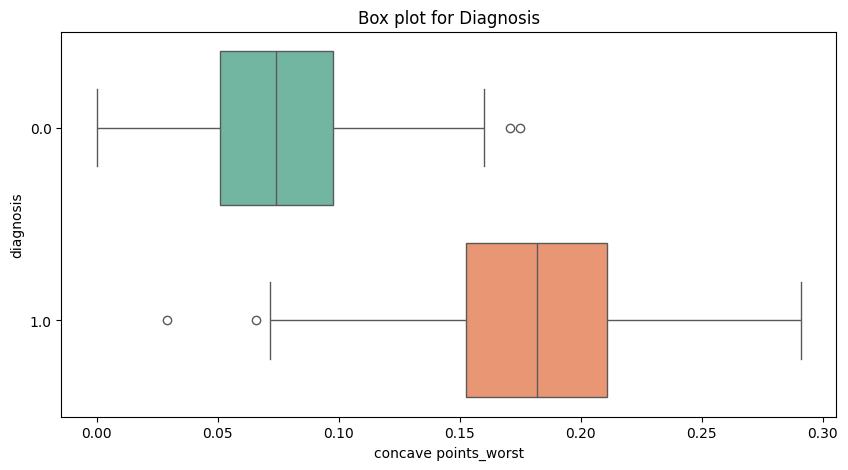

In [11]:
#Creating box plots for Diagnosis vs Other highly correlated columns 

for col in var_of_interest:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y=var, data=data, palette='Set2', orient='h') 
    plt.title(f"Box plot for Diagnosis")
    plt.xlabel(col)
    plt.ylabel(var) 
    plt.show()

    

### Insights from Data Exploration

#### - The dependent variable diagnosis is just a binary variable (Malignant - 1, Benign - 0).

#### - All the highly correlated (>0.7) variables with 'Diagnosis' like radius_mean, perimeter_mean, radius_worst etc., have right skewed distributions i.e most of them have smaller means. However, some of these variables are perfectly correlated with each other, which can be seen in the heatmap.

#### - As observed in boxplots, in most cases, there are no major overlaps between the independent values and the diagnosis (Malignant or Benign) meaning, we can differentiate them properly. This is just a high level insight considering only based on their 25th to 75th percentile range. 


## 2. Logistic Regression

In [21]:
#Creating and running a logistic regression model with all the variables

# Model 1 
X=data.drop([var], axis=1)
y=data[var]
x=sm.add_constant(X)
results = sm.GLM(y, x, family=sm.families.Binomial()).fit()
print(results.summary())

print("Here we are seeing the Pseudo R-square being NaN which means the model may be failed to fit properly. This could be due to multi-collinearity that we have discovered earlier in the data exploration analysis.")

print(f"And the estimated R-sqaured for this model is {1-results.deviance/results.null_deviance}.")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      538
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 25 Jan 2024   Deviance:                       921.03
Time:                        22:24:12   Pearson chi2:                 4.50e+16
No. Iterations:                    33   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

/opt/homebrew/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/opt/homebrew/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


In [26]:
#Check Variation Inflation Factor for each one of these variables now

vif_model1 = pd.DataFrame()
vif_model1['Columns'] = x.columns

for col_no in range(len(x.columns)):
    vif_model1.at[col_no,'vif']=variance_inflation_factor(x.values, col_no)
print(vif_model1)
print(f"\nThere are around {len(vif_model1[vif_model1['vif']>5])} variables that have VIF more than 10.")

                    Columns          vif
0                     const  1868.188844
1               radius_mean  3806.115296
2              texture_mean    11.884048
3            perimeter_mean  3786.400419
4                 area_mean   347.878657
5           smoothness_mean     8.194282
6          compactness_mean    50.505168
7            concavity_mean    70.767720
8       concave points_mean    60.041733
9             symmetry_mean     4.220656
10   fractal_dimension_mean    15.756977
11                radius_se    75.462027
12               texture_se     4.205423
13             perimeter_se    70.359695
14                  area_se    41.163091
15            smoothness_se     4.027923
16           compactness_se    15.366324
17             concavity_se    15.694833
18        concave points_se    11.520796
19              symmetry_se     5.175426
20     fractal_dimension_se     9.717987
21             radius_worst   799.105946
22            texture_worst    18.569966
23          peri

In [27]:
#Let us now drop all the variables that have VIF more than 5.

# Model 2 

drop_cols = vif_model1[vif_model1['vif']>5]['Columns'].values.tolist()
model_2_data = x.drop(drop_cols,axis=1)

In [28]:
#Re-run the logistic regresion 
results_2 = sm.GLM(y, model_2_data, family=sm.families.Binomial()).fit()
print(results_2.summary())

print(f"The R-sqaured for the model is {1-results_2.deviance/results_2.null_deviance}")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      566
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -370.40
Date:                Thu, 25 Jan 2024   Deviance:                       740.81
Time:                        22:27:43   Pearson chi2:                     632.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01851
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
symmetry_mean     4.3683      1.530      2.854

In [29]:
#Checking the VIF for model 2

vif_model2 = pd.DataFrame()
vif_model2['Columns'] = model_2_data.columns

for col_no in range(len(model_2_data.columns)):
    vif_model2.at[col_no,'vif']=variance_inflation_factor(model_2_data.values, col_no)

vif_model2

,Columns,vif
0,symmetry_mean,8.347769
1,texture_se,6.845762
2,smoothness_se,7.834620


In [30]:
#The R-squared value hasn't increased much, so let us increase threshold of VIP to be considered. Since, there are variables with VIF more 
#than 100, we will now consider 100 as our threshold. 

# Model 3

drop_cols = vif_model1[vif_model1['vif']>100]['Columns'].values.tolist()
model_3_data = x.drop(drop_cols,axis=1)

results_3= sm.GLM(y, model_3_data, family=sm.families.Binomial()).fit()
print(results_3.summary())

print(f"The R-squared for the model is {1-results_3.deviance/results_3.null_deviance}")
print(f"The R-squared has increased and this new model explains the variability better, however it is important to note that most of the variables are not still not significant. ")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      545
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27.938
Date:                Thu, 25 Jan 2024   Deviance:                       55.876
Time:                        22:29:35   Pearson chi2:                 2.13e+03
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7055
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
texture_mean              

####   Steps that needs to be taken:
#### - Run the whole model, and validate. If model is not fitted, check for multi-collineartiy and other model convergence issues 
#### - For multi-collinearity, check the VIF. ALl the variables that have VIF more than 5 can be removed. But if the R-square is still not high, increase that cut-off. Although, VIF more than 10 itself implies that the variable is collinear, high cut-off's like 100 is chosen as it gives us a higher R-square in this case, but it is good to note that increasing variables will always increase the R-squared in an in-sample data.
#### - So for now, we'll just stick to the model 2 (i.e the second model) as it contains variables that are not multi-collinear, although the R-square is very low, it is more reliable. 

## 3. Model Evaluation

In [31]:
#Evaluating the Model 2 that has no variables that are collinear (VIF<10)

#Creating the train, test split for our data
x_train, x_test,y_train, y_test = train_test_split(model_2_data, y, train_size = 0.8, random_state = 30)

results_training = sm.GLM(y_train, x_train, family=sm.families.Binomial()).fit()

#Training model
print(results_training.summary())

y_pred= results_training.predict(x_test)

#Calculating the R-square
r_sq = r2_score(y_test, y_pred)

#Calculating the Root Mean Square Error (RMSE)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"The r-square of the model is {r_sq}, and teh root mean square error is {rmse}.")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      452
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -294.40
Date:                Thu, 25 Jan 2024   Deviance:                       588.80
Time:                        22:29:53   Pearson chi2:                     519.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02277
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
symmetry_mean     4.5370      1.713      2.649

#### The R-square value is approximately 0.0157 which mean the model can only explain 1.57% of the variability in diagnosis, which it is little low. The RMSE suggests that on average, the model's predictions are within an error of roughly 48.29% from the true diagnosis status, which is still not enough for a good model. However, we can interpret that for a unit increase in smoothness_se (which is a significant variable), there is a significant decrease in log odds of diagnosis, the probability of breast cancer being malignant is very less. And similarly, when there is a unit increase in symmetry_mean, there is an inrease in log odds implying that the probability of cancer being benign is less. 

## 4. Testing Interactions Between Features

In [32]:
# Variables from model 2
model_2_data.columns

Index(['symmetry_mean', 'texture_se', 'smoothness_se'], dtype='object')

In [33]:

## Interaction without categorical variables 

#We'll create interaction between variables from our model 2 

print(f"Variables in our model 2 {model_2_data.columns}.")

#Create a copy of model_2_data 
model_2_data_int1 = model_2_data.copy()

#Creating interaction terms in our data
model_2_data_int1['symmetry_mean_texture_se'] = model_2_data_int1['symmetry_mean'] * model_2_data_int1['texture_se']
model_2_data_int1['symmetry_mean_smoothness_se'] = model_2_data_int1['symmetry_mean'] * model_2_data_int1['smoothness_se']
model_2_data_int1['texture_se_smoothness_se'] = model_2_data_int1['texture_se'] * model_2_data_int1['smoothness_se']

# Creating x & y variables for regression
model_interaction = model_2_data_int1
y_interaction = data['diagnosis']

# Splitting the data into training and testing sets
x_interaction_train, x_interaction_test, y_interaction_train, y_interaction_test = train_test_split(model_interaction, y_interaction, train_size=0.8, random_state=30)

#Adding the constant term
x_interaction_train = sm.add_constant(x_interaction_train)

# Fit a linear regression model
linear_model_interaction = sm.OLS(y_interaction_train, x_interaction_train)
linear_model_interaction = linear_model_interaction.fit()

# Display the summary
print(linear_model_interaction.summary())

Variables in our model 2 Index(['symmetry_mean', 'texture_se', 'smoothness_se'], dtype='object').
                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     15.06
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           9.95e-16
Time:                        22:35:00   Log-Likelihood:                -272.31
No. Observations:                 455   AIC:                             558.6
Df Residuals:                     448   BIC:                             587.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [34]:
## Interaction with categorical variables 

# Again we'll create interaction terms from model 2 variables, however now we'll only add them with our categorical variable 'diagnosis'.

# Create a copy of model_2_data 
model_2_data_int2 = model_2_data.copy()

for col in model_2_data_int2.columns:
    model_2_data_int2[f'diagnosis_{col}'] = data['diagnosis'] * model_2_data_int2[col]

# Creating x & y variables for regression
model_interaction_2= model_2_data_int2
y_interaction_2 = data['diagnosis']

# Splitting the data into training and testing sets
x_interaction_train_2, x_interaction_test_2, y_interaction_train_2, y_interaction_test_2 = train_test_split(model_interaction_2, y_interaction_2, train_size=0.8, random_state=30)

#Adding the constant term
x_interaction_train_2 = sm.add_constant(x_interaction_train_2)

# Fit a linear regression model
linear_model_interaction_2 = sm.OLS(y_interaction_train_2, x_interaction_train_2)
linear_model_interaction_2 = linear_model_interaction_2.fit()

# Display the summary
print(linear_model_interaction_2.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     4044.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:35:05   Log-Likelihood:                 598.19
No. Observations:                 455   AIC:                            -1182.
Df Residuals:                     448   BIC:                            -1154.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Insights 

#### Without Categorical Interactions - This model is able to explain 16.8% of the variability in diagnosis, which improved considerably from our model 2 i.e without interaction and non-collinear variables. The interaction between symmetry_mean and smoothness_se is very significant and have a negative co-efficient of -989.10.  

#### With Categorical Interactions - The R-squared value has gone up a lot, reaching 0.982. This means that the model now explains 98.2% of the differences in the dependent variable, showing a strong fit. The interaction terms (diagnosissymmetry_mean, diagnosistexture_se, and diagnosis*smoothness_se) are very important, with p-values almost at 0. This shows that the diagnosis status significantly changes how these continuous variables affect the result. The positive coefficients for the interaction terms suggest that for one category of diagnosis, the impact of the continuous variables on the result is more clear.

#### Issues with Linear Regression for Binary Outcomes -  As we can see the linear regression for a binary outcome does not make much sense as there are only two distinct value for diagnosis. Even though the R-squared is on the higher side, it might be a bit confusing because: The connection between dependent and independent variables are not easily interpretable by itself.

#### Interpreting Interaction Terms - The interaction terms shows that the relationship between the independent variables and the result isn't uniform across for different diagnosis levels. Although, interaction terms are significant, the interpretation in a linear model for a binary dependent variable is not easily done.

#### Implications - When we think that for various diagnosis intensity, the ability to predict and the impact of the continuous variables might change. In real-life situations, this info could help personalize treatment based on how these variables interact with patient diagnosis.

## 5. Feature Selection and Cross-Validation: Full vs. Reduced Model

In [36]:
# Running our full model 

# Full model
X=data.drop([var], axis=1)
print(len(X.columns))
y=data[var]
x=sm.add_constant(X)
model = sm.Logit(y, x)
results_full_model = model.fit_regularized(method='l1')
# results_full_model = sm.GLM(y, x, family=sm.families.Binomial()).fit()
print(results_full_model.summary())

30


/opt/homebrew/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/homebrew/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03148814694046345
            Iterations: 503
            Function evaluations: 518
            Gradient evaluations: 503
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      538
Method:                           MLE   Df Model:                           30
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                  0.9523
Time:                        23:03:03   Log-Likelihood:                -17.917
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.728e-131
                              coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [37]:
significant_cols=results_full_model.pvalues[results_full_model.pvalues<0.1]
print(significant_cols)



concavity_se     0.055385
texture_worst    0.098396
dtype: float64


In [38]:
#Function to determine the modified p* value based on the BH Procedure

def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")
  
  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return alpha, sorted_pvals[np.where(below_threshold)]

Alpha: 0.8645918905619645


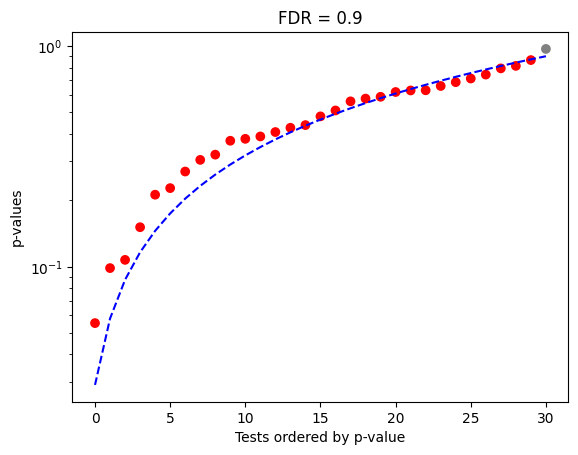

The number of true discoveries are 9.

These are the significant metrics that help us estimate the outstanding shares ['const', 'radius_mean', 'perimeter_mean', 'smoothness_se', 'compactness_se', 'fractal_dimension_se', 'radius_worst', 'compactness_worst', 'concave points_worst'].

The coefficient of these significant metrics that help us estimate the outstanding shares are shown below. 

const                    -8.962929
radius_mean              -6.997856
perimeter_mean           -1.338706
smoothness_se           539.171457
compactness_se           61.634908
fractal_dimension_se   -606.845482
radius_worst             -2.002854
compactness_worst       -17.654955
concave points_worst     48.377446
dtype: float64.


In [39]:
#Since we didn't get any significant co-efficients, we'll set a high false discovery rate for our reduced model

# False discovery control rate with q=0.9
alpha_threshold, below_threshold = fdr(results_full_model.pvalues, 0.9, plotit=True)

#Finding the significant metrics
significant_cols=results_full_model.pvalues[results_full_model.pvalues.isin(below_threshold)]

#Finding the coefficients of these significant metrics
significant_cols_coef=results_full_model.params[results_full_model.params.reset_index()["index"].isin(significant_cols.index.tolist()).tolist()]

print(f"The number of true discoveries are {len(below_threshold)}.\n")
print(f"These are the significant metrics that help us estimate the outstanding shares {significant_cols.index.tolist()}.\n")
print(f"The coefficient of these significant metrics that help us estimate the outstanding shares are shown below. \n\n{significant_cols_coef}.")

In [40]:
#Storing the significant cols from the FDR method from our full model, removing the 'const' and storing them.

significant_cols=significant_cols.index.tolist()
significant_cols.remove('const')
print(significant_cols)

['radius_mean', 'perimeter_mean', 'smoothness_se', 'compactness_se', 'fractal_dimension_se', 'radius_worst', 'compactness_worst', 'concave points_worst']


In [41]:
# Running the logistic regression on the reduced model

# Reduced model
X_reduced=data[significant_cols].copy()
y_reduced=data[var].copy()
X_reduced=sm.add_constant(X_reduced)
model_reduced = sm.Logit(y_reduced, X_reduced)
results_reduced_model = model_reduced.fit_regularized(method='l1')
# results_reduced_model = sm.GLM(y_reduced, X_reduced, family=sm.families.Binomial()).fit()
print(results_reduced_model.summary())



# print(f"And the estimated R-sqaured for the reduced model is {1-results_reduced_model.deviance/results_reduced_model.null_deviance}")


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.10394684470812023
            Iterations: 132
            Function evaluations: 135
            Gradient evaluations: 132
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      560
Method:                           MLE   Df Model:                            8
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                  0.8426
Time:                        23:03:06   Log-Likelihood:                -59.146
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.742e-131
                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

In [42]:
# Running the cross-validation for the full model

X = data.drop('diagnosis', axis=1)
X = sm.add_constant(X)
y = data['diagnosis']

# Define the model with intercept
full_model = LogisticRegression(fit_intercept=True)

#Creating a pipeline
pipeline = make_pipeline(StandardScaler(), full_model)

#Setting the the 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

#Defining the scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

#Performing the 10-fold cross-validation
results_full = cross_validate(pipeline, X, y, cv=kfold, scoring=scoring)

# Print the mean and standard deviation of each metric
print("Mean Scores:")
print(f"Mean Accuracy: {np.mean(results_full['test_accuracy'])}")
print(f"Mean Precision: {np.mean(results_full['test_precision'])}")
print(f"Mean Recall: {np.mean(results_full['test_recall'])}")
print(f"Mean F1 Score: {np.mean(results_full['test_f1'])}")

Mean Scores:
Mean Accuracy: 0.9718671679197994
Mean Precision: 0.9692487922705315
Mean Recall: 0.9571091178306146
Mean F1 Score: 0.9621510943871192


In [43]:
# Running the cross-validation for the reduced model

X_reduced=data[significant_cols].copy()
y_reduced=data[var].copy()
X_reduced=sm.add_constant(X_reduced)

#Defining the model with intercept
reduced_model = LogisticRegression(fit_intercept=True)

#Creating a pipeline
pipeline = make_pipeline(StandardScaler(), reduced_model)

#Setting the the 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

#Defining the scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

#Performing the 10-fold cross-validation
results_reduced = cross_validate(pipeline, X_reduced, y_reduced, cv=kfold, scoring=scoring)

# Print the mean and standard deviation of each metric
print("Mean Scores:")
print(f"Mean Accuracy: {np.mean(results_reduced['test_accuracy'])}")
print(f"Mean Precision: {np.mean(results_reduced['test_precision'])}")
print(f"Mean Recall: {np.mean(results_reduced['test_recall'])}")
print(f"Mean F1 Score: {np.mean(results_reduced['test_f1'])}")

Mean Scores:
Mean Accuracy: 0.9489974937343358
Mean Precision: 0.9447222222222222
Mean Recall: 0.9209806296140257
Mean F1 Score: 0.9295161373801415


#### By comparing the full and reduced model, we can clearly see that full model performs slightly better in terms of mean accuracy, precision, recall and F1-score. However, to keep the model more parsimonius and avoid overfitting, the reduced model is more robust and will give us a stable model than the full model.